In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge


In [3]:
df  = pd.read_csv('Dataset.csv')

In [4]:
df.head()

,Company Name,Model,price,km,Owner,Car Age,fuel,location,Model_rank,fuel_rank
0,Honda,City,1025000,24000,1,3,Diesel,Delhi,9,6
1,Honda,City,299000,76347,2,14,Petrol,Bangalore,9,5
2,Honda,WR-V,750000,41855,1,4,Diesel,Navi Mumbai,76,6
3,Honda,Civic,320000,66867,1,14,Petrol,Hyderabad,91,5
4,Honda,City,350000,57409,2,10,Petrol,Mumbai,9,5


In [5]:
df.drop(columns=['Model_rank', 'fuel_rank'],axis=1,inplace=True)

In [6]:
df.head()

,Company Name,Model,price,km,Owner,Car Age,fuel,location
0,Honda,City,1025000,24000,1,3,Diesel,Delhi
1,Honda,City,299000,76347,2,14,Petrol,Bangalore
2,Honda,WR-V,750000,41855,1,4,Diesel,Navi Mumbai
3,Honda,Civic,320000,66867,1,14,Petrol,Hyderabad
4,Honda,City,350000,57409,2,10,Petrol,Mumbai


In [7]:
df.drop(df.loc[df['location']=='Ranchi'].index, inplace=True)
df.drop(df.loc[df['location']=='Rajkot'].index, inplace=True)
df.drop(df.loc[df['location']=='Akola'].index, inplace=True)
df.drop(df.loc[df['location']=='Raipur'].index, inplace=True)
df.drop(df.loc[df['location']=='Jamshedpur'].index, inplace=True)
df.drop(df.loc[df['location']=='Tiruchirappalli'].index, inplace=True)
df.drop(df.loc[df['location']=='Vadodara'].index, inplace=True)
df.drop(df.loc[df['location']=='Surat'].index, inplace=True)
df.drop(df.loc[df['location']=='Kalamassery'].index, inplace=True)
df.drop(df.loc[df['location']=='Indore'].index, inplace=True)
df.drop(df.loc[df['location']=='Kochi'].index, inplace=True)
df.drop(df.loc[df['location']=='Karnal'].index, inplace=True)
df.drop(df.loc[df['location']=='location'].index, inplace=True)

In [8]:
df.reset_index(drop=True,inplace=True)


In [9]:
df['location'].value_counts()

Mumbai                866
Delhi                 445
Hyderabad             435
Bangalore             321
Pune                  266
Chennai               243
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Jaipur                 60
Nashik                 56
Bhopal                 53
Noida                  49
Navi Mumbai            47
Gurgaon                35
Faridabad              33
Ghaziabad              28
Thiruvananthapuram     24
Bellary                23
Mangalore              23
Aurangabad             22
Kollam                 22
Mysore                 22
Nagpur                 12
Lucknow                12
Pondicherry            10
Name: location, dtype: int64

In [10]:
df["location"].replace({"Ghaziabad": "Delhi","Noida":"Delhi","Gurgaon":"Delhi","Faridabad":"Delhi"}, inplace=True)

df["location"].replace({"Mangalore": "Bangalore","Mysore":"Bangalore","Bellary":"Bangalore"}, inplace=True)

df["location"].replace({"Pondicherry": "Chennai"}, inplace=True)

df["location"].replace({"Kollam": "Thiruvananthapuram"}, inplace=True)

df["location"].replace({"Lucknow": "Bhopal"}, inplace=True)

df["location"].replace({"Aurangabad": "Nagpur", "Nashik": "Nagpur"}, inplace=True)

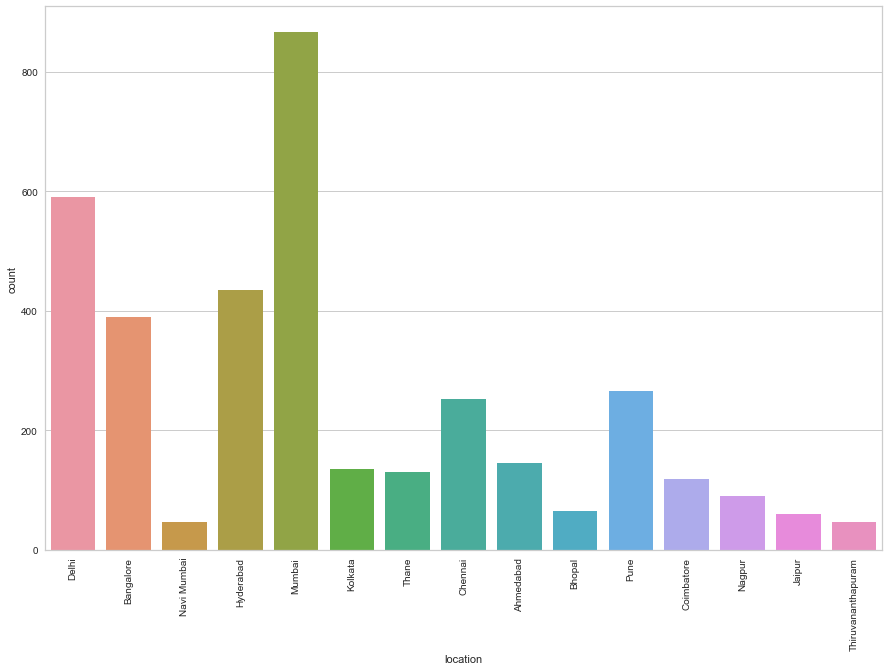

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data= df)
plt.xticks(rotation=90)
plt.show()

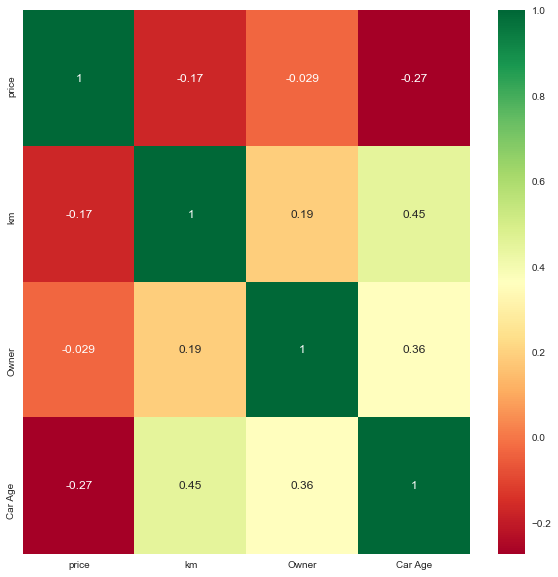

In [12]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='km', ylabel='Density'>

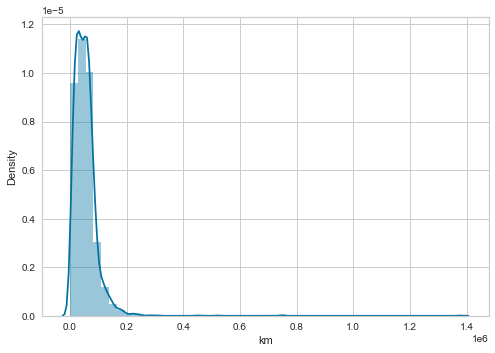

In [13]:
sns.distplot(df['km'])


<AxesSubplot:xlabel='Car Age', ylabel='Density'>

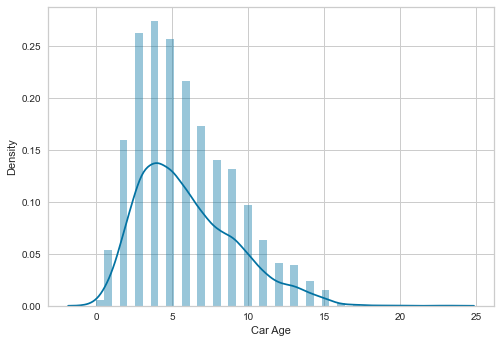

In [14]:
sns.distplot(df['Car Age'])

<AxesSubplot:xlabel='price', ylabel='Density'>

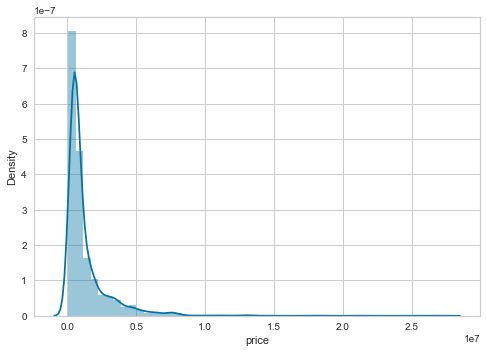

In [15]:
sns.distplot(df['price'])

In [16]:
df_cont = df[['Car Age','km']]

In [17]:
df_cat=df[['Company Name','location','Model', 'fuel','Owner']]

In [18]:
#df_cat=df[['Company Name','Model', 'fuel','Owner']]

In [19]:
df_dum=pd.get_dummies(df_cat,drop_first=True)

In [20]:
X=pd.merge(df_cont,df_dum,on=df_cat.index)
y= df[['price']]

In [21]:
X.shape

(3637, 251)

In [22]:
y.tail()

,price
3632,310000
3633,395000
3634,340000
3635,345600
3636,365000


In [23]:
y.shape

(3637, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)


In [26]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
regr.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
y_pred = regr.predict(X_test)

In [29]:
regr.score(X_test, y_test, sample_weight=None) 

0.7198854306648075

In [30]:
regr.score(X_train, y_train, sample_weight=None) 

0.9671264885702144

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [32]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.9], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [33]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 7,
                        n_jobs = -1,
                        verbose=7)
xgb_grid.fit(X_train,y_train)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
[21:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [34]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.6700022467481859
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [35]:
params = {'colsample_bytree': [0.7],
          'learning_rate':[0.03], 
          'max_depth':[5],
          'min_child_weight':[4], 
          'n_estimators':[500], 
          'nthread': [4],
          'objective': ['reg:linear'],
          'silent': [1],
          'subsample': [0.7]}

In [36]:
xgb_grid = GridSearchCV(xgb1,
                        params,
                        cv = 7,
                        n_jobs =-1,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits
[21:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [37]:
print(xgb_grid.best_score_)

0.664431857647658


In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
reg_rf.score(X_train, y_train)


0.9603193830348664

In [40]:
reg_rf.score(X_test,y_test)

0.7368787323517747

In [41]:
r2_score(y_test,y_pred)

0.7198854306648075

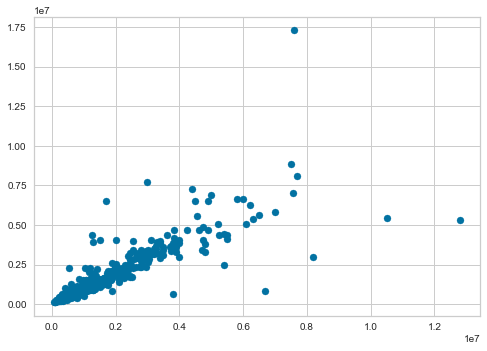

In [42]:
plt.scatter(y_test,y_pred)

In [43]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     75.18
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        21:53:59   Log-Likelihood:                -43271.
No. Observations:                2909   AIC:                         8.695e+04
Df Residuals:                    2703   BIC:                         8.819e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
key_0                          -9.8291     15.110     -0.651      0.515     -39.457      19.799
Car Age                     -1.356e+05   5891.409    -23.024      0.000   -1.47e+05   -1.24e+05
km                             -3.4449      0.378     -9.113      0.000      -4.186      -2.704
Owner                       -4.721e+04   3.85e+04     -1.227      0.220   -1.23e+05    2.82e+04
Company Name_Audi            3.755e+06   1.68e+05     22.294      0.000    3.42e+06    4.08e+06
Company Name_BMW             3.344e+06   1.94e+05     17.214      0.000    2.96e+06    3.72e+06
Company Name_Bentley         5.973e+06   2.35e+05     25.395      0.000    5.51e+06    6.43e+06
Company Name_Chevrolet       1.552e+06   2.36e+05      6.565      0.000    1.09e+06    2.02e+06
Company Name_Datsun          6.172e+05   1.77e+05      3.485      0.000     2.7e+05    9.64e+05
Company Name_Fiat            6.814e+05   1.44e+05      4.719      0.000    3.98e+05    9.65e+05
Company Name_Force          -4.157e-09   1.72e-09     -2.423      0.015   -7.52e-09   -7.94e-10
Company Name_Ford            1.512e+06   1.95e+05      7.735      0.000    1.13e+06     1.9e+06
Company Name_Honda           1.492e+06   1.48e+05     10.086      0.000     1.2e+06    1.78e+06
Company Name_Hummer           6.88e+06   3.71e+05     18.526      0.000    6.15e+06    7.61e+06
Company Name_Hyundai         1.569e+06   1.62e+05      9.681      0.000    1.25e+06    1.89e+06
Company Name_Isuzu           1.218e+06   3.71e+05      3.278      0.001    4.89e+05    1.95e+06
Company Name_Jaguar          5.838e+06   2.05e+05     28.503      0.000    5.44e+06    6.24e+06
Company Name_Jeep            2.491e+06   2.69e+05      9.244      0.000    1.96e+06    3.02e+06
Company Name_Kia             1.707e+06   1.95e+05      8.740      0.000    1.32e+06    2.09e+06
Company Name_Lamborghini       1.7e+07   3.61e+05     47.039      0.000    1.63e+07    1.77e+07
Company Name_Land            2.662e+06   9.72e+04     27.378      0.000    2.47e+06    2.85e+06
Company Name_Lexus            3.33e+06   3.58e+05      9.310      0.000    2.63e+06    4.03e+06
Company Name_MG              2.344e+06   1.66e+05     14.090      0.000    2.02e+06    2.67e+06
Company Name_Mahindra        1.488e+06   1.79e+05      8.315      0.000    1.14e+06    1.84e+06
Company Name_Maruti          6.893e+05   7.42e+04      9.290      0.000    5.44e+05    8.35e+05
Company Name_Maserati        3.168e+06   3.71e+05      8.547      0.000    2.44e+06     3.9e+06
Company Name_Mercedes-Benz   4.406e+06   1.71e+05     25.712      0.000    4.07e+06    4.74e+06
Company Name_Mini            2.346e+06   2.62e+05      8.959      0.000    1.83e+06    2.86e+06
Company Name_Mitsubishi      2.091e+06   2.95e+05      7.081      0.000    1.51e+06    2.67e+06
Company Nam

In [44]:
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)


def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [45]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [46]:
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.1549016544419866
Root MSLE : 0.3935754748990168
R2 Score : 0.4893208941996303 or 48.9321%


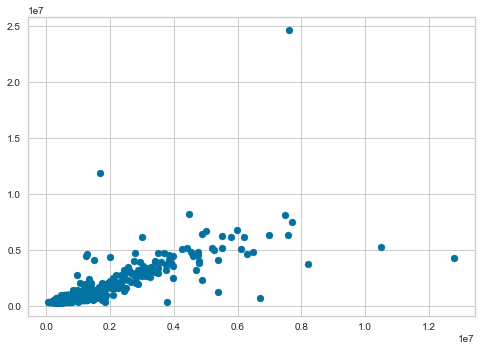

In [47]:
plt.scatter(y_test,y_pred)

In [48]:

ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [49]:
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.13103639753143664
Root MSLE : 0.3619894992005108
R2 Score : 0.525300314226514 or 52.53%


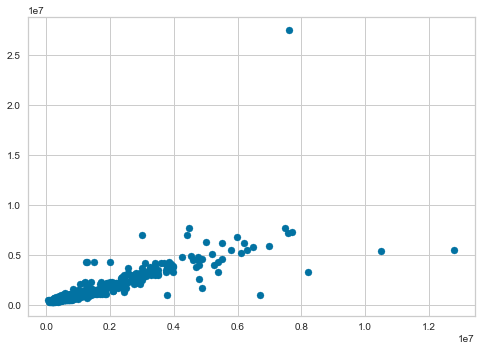

In [50]:
plt.scatter(y_test,y_pred)


In [51]:
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge


In [52]:
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)
  
# Model making a prediction on test data
prediction = model.predict(X_test)
  
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")


r2 Score Of Test Set : 0.047510421184872254


In [53]:
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [54]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

Mean MAE: 411314.897 (44593.906)
r2 Score Of Test Set : 0.7097296064899485


In [55]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


MAE: -405096.121
Config: {'alpha': 0.17}


In [56]:
model = Ridge(alpha=0.17)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [57]:
print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

r2 Score Of Test Set : 0.6694562767745279


In [58]:

lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [59]:
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0,1)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(f"r2 Score Of Test Set : {r2_score(y_test,y_pred)}")

MAE: -405995.846
Config: {'alpha': 0}
r2 Score Of Test Set : 0.5343544287018337
